In [371]:
from sklearn.model_selection import train_test_split
from numpy import random
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings("ignore")
print("DONE")

y_train = pd.read_csv("generated_data/df_y_train.csv", header=None)
y_test = pd.read_csv("generated_data/df_y_test.csv", header=None)
x_train = pd.read_csv("generated_data/df_X_train.csv", header=None)
x_test = pd.read_csv("generated_data/df_X_test.csv", header=None)


DONE


## SKLEARN VERSION


In [372]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
# x_test.head(3)
x_train.head(3)


(200, 10)
(200, 10)
(200, 1)
(200, 1)


,0,1,2,3,4,5,6,7,8,9
0,0.373608,0.139583,0.052149,0.019483,0.007279,0.002720,0.001016,0.000380,0.000142,0.000053
1,0.751840,0.565263,0.424987,0.319522,0.240230,0.180614,0.135793,0.102095,0.076759,0.057710
2,0.766312,0.587234,0.450004,0.344844,0.264258,0.202504,0.155181,0.118917,0.091128,0.069832


In [373]:
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(200, 10)
(200, 10)
(200, 1)
(200, 1)


11.026552745523817
5.3959005231490575
4.002471272215685
3.2211694819486265
2.8517747375559463
2.5528480999102627
2.4115225132252798
2.304485803675953
2.1446483563142347
2.087418863891135
2.0244372362180085
1.9563789486328818
1.9023605138537603
1.8465325961356172


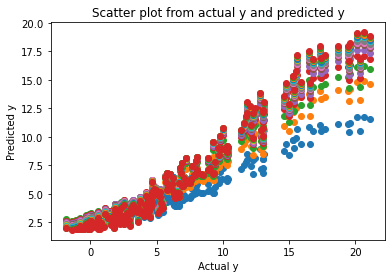

In [374]:
# SkLearn SGD classifier
n_iter = np.arange(1, 15)
error = []
for n in n_iter:
    clf_ = SGDRegressor(max_iter=n)
    clf_.fit(x_train, y_train)
    y_pred_sksgd = clf_.predict(x_test)
    plt.scatter(y_test, y_pred_sksgd)
    plt.grid()
    plt.xlabel('Actual y')
    plt.ylabel('Predicted y')
    plt.title('Scatter plot from actual y and predicted y')
    error.append(mean_squared_error(y_test, y_pred_sksgd))
    print(mean_squared_error(y_test, y_pred_sksgd))
    # plt.show()


In [375]:
print('Mean Squared Error :', error)


Mean Squared Error : [11.026552745523817, 5.3959005231490575, 4.002471272215685, 3.2211694819486265, 2.8517747375559463, 2.5528480999102627, 2.4115225132252798, 2.304485803675953, 2.1446483563142347, 2.087418863891135, 2.0244372362180085, 1.9563789486328818, 1.9023605138537603, 1.8465325961356172]


In [376]:
# SkLearn SGD classifier predicted weight matrix
sklearn_w = clf_.coef_
sklearn_w


array([2.92011987, 2.57960609, 2.21583634, 1.92057052, 1.68633263,
       1.49829034, 1.34456128, 1.21659805, 1.10834775, 1.01548515])

## "CUSTOM" BATCH VERSION


In [377]:
def My2CustomSGD(train_data, learning_rate, n_iter, k, divideby):
    w = np.zeros(shape=(1, train_data.shape[1]-1))
    b = 0
    cur_iter = 1
    while(cur_iter <= n_iter):
        #         print("LR: ",learning_rate)
        temp = train_data.sample(k)
        # print(temp.head(3))
        y = np.array(temp['prediction'])
        x = np.array(temp.drop('prediction', axis=1))
        w_gradient = np.zeros(shape=(1, train_data.shape[1]-1))
        b_gradient = 0
        for i in range(k):
            prediction = np.dot(w, x[i])+b
#             w_gradient=w_gradient+(-2/k)*x[i]*(y[i]-(prediction))
#             b_gradient=b_gradient+(-2/k)*(y[i]-(prediction))
            w_gradient = w_gradient+(-2)*x[i]*(y[i]-(prediction))
            b_gradient = b_gradient+(-2)*(y[i]-(prediction))
        w = w-learning_rate*(w_gradient/k)
        b = b-learning_rate*(b_gradient/k)

        cur_iter = cur_iter+1
        learning_rate = learning_rate/divideby
    return w, b


In [378]:
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)

In [379]:
train_data=pd.DataFrame(x_train)
train_data['prediction']=y_train
train_data.head(3)

,0,1,2,3,4,5,6,7,8,9,prediction
0,0.373608,0.139583,0.052149,0.019483,0.007279,0.002720,0.001016,0.000380,0.000142,0.000053,1.639174
1,0.751840,0.565263,0.424987,0.319522,0.240230,0.180614,0.135793,0.102095,0.076759,0.057710,8.890356
2,0.766312,0.587234,0.450004,0.344844,0.264258,0.202504,0.155181,0.118917,0.091128,0.069832,7.797150


Custom Mean Squared Error : 36.04017448634844
Custom Mean Squared Error : 26.55371516727735
Custom Mean Squared Error : 43.11015325624705
Custom Mean Squared Error : 43.78299634972845
Custom Mean Squared Error : 38.35131216877768
Custom Mean Squared Error : 26.069318142479702
Custom Mean Squared Error : 33.507995658161256
Custom Mean Squared Error : 36.20280539945526
Custom Mean Squared Error : 41.691541707348826
Custom Mean Squared Error : 31.518522352465798
Custom Mean Squared Error : 40.688283150599055
Custom Mean Squared Error : 33.71308772308187
Custom Mean Squared Error : 34.85074598140029
Custom Mean Squared Error : 33.81918583985012


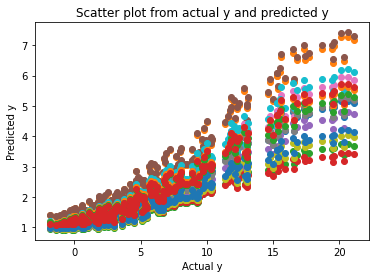

In [380]:
error_batch = []
for n in n_iter:
	w,b=My2CustomSGD(train_data,learning_rate=0.05,n_iter=10,divideby=2,k=10)
	y_pred_customsgd=predict(x_test,w,b)
	error_batch.append(mean_squared_error(y_test, y_pred_customsgd))
	plt.scatter(y_test,y_pred_customsgd)
	plt.grid()
	plt.xlabel('Actual y')
	plt.ylabel('Predicted y')
	plt.title('Scatter plot from actual y and predicted y')
	#plt.show()
	print('Custom Mean Squared Error :',mean_squared_error(y_test, y_pred_customsgd)) 

In [381]:
# weight vector obtained from impemented SGD Classifier
custom_w=w
print(custom_w)
print(type(custom_w))

[[0.84034342 0.68141095 0.57572146 0.49916356 0.44055192 0.39384026
  0.35544113 0.32309565 0.29531806 0.27109525]]
<class 'numpy.ndarray'>


In [382]:
print("Differences between SGD god model and custom reference: ", abs(np.subtract(error, error_batch)))

Differences between SGD god model and custom reference:  [25.01362174 21.15781464 39.10768198 40.56182687 35.49953743 23.51647004
 31.09647314 33.8983196  39.54689335 29.43110349 38.66384591 31.75670877
 32.94838547 31.97265324]


## Another? 